In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:16<00:00, 76.6MB/s]
100% 1.06G/1.06G [00:16<00:00, 70.6MB/s]


In [3]:
import zipfile
zip = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip.extractall('/content')
zip.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

In [5]:
# train generator
batch_size = 32
size = 256
train_dataset = keras.utils.image_dataset_from_directory(directory='/content/train',
                                         labels ='inferred',
                                         label_mode = 'int',
                                         batch_size = batch_size,
                                         image_size = (size,size))

Found 20000 files belonging to 2 classes.


In [6]:
# validation generator
batch_size = 32
size = 256
validation_dataset = keras.utils.image_dataset_from_directory(directory='/content/test',
                                         labels ='inferred',
                                         label_mode = 'int',
                                         batch_size = batch_size,
                                         image_size = (size,size))

Found 5000 files belonging to 2 classes.


In [7]:
# Normalization of Image
def norm(image, label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_dataset = train_dataset.map(norm)
validation_dataset = validation_dataset.map(norm)

In [8]:
# Creating a CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size= (3,3),padding='valid',activation='relu',input_shape=(size,size,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size= (3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size= (3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.5605 - loss: 3.0662 - val_accuracy: 0.6786 - val_loss: 0.6022
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 80ms/step - accuracy: 0.6857 - loss: 0.5980 - val_accuracy: 0.7110 - val_loss: 0.5530
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7599 - loss: 0.4994 - val_accuracy: 0.6890 - val_loss: 0.5777
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.7964 - loss: 0.4352 - val_accuracy: 0.7576 - val_loss: 0.4895
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.8346 - loss: 0.3770 - val_accuracy: 0.7868 - val_loss: 0.4541
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.8608 - loss: 0.3257 - val_accuracy: 0.7484 - val_loss: 0.5135
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8942 - loss: 0.2511 - val_accuracy: 0.7786 - val_loss: 0.5080
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.9212 - loss: 0.1940 - 

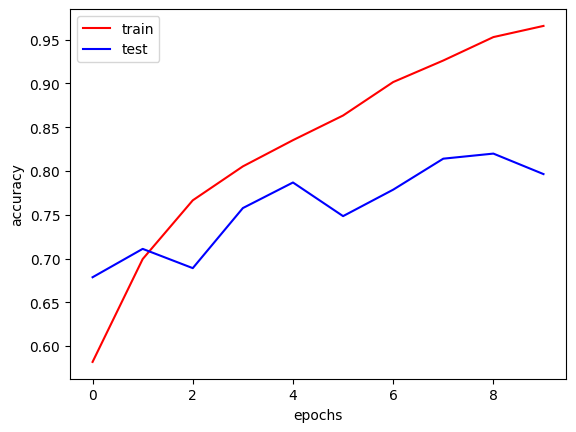

In [11]:
# plotting training and validation acuuracy of model

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

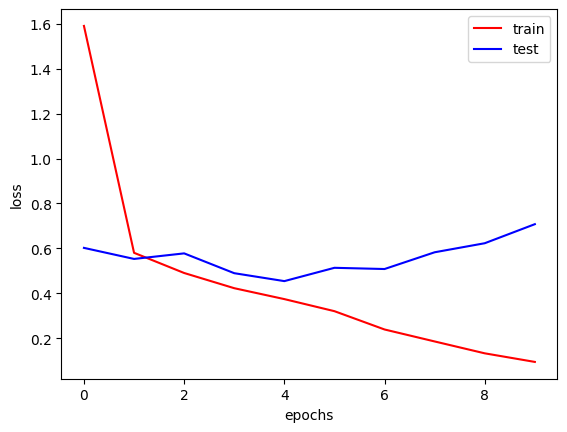

In [12]:
# plotting training and validation loss of model
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

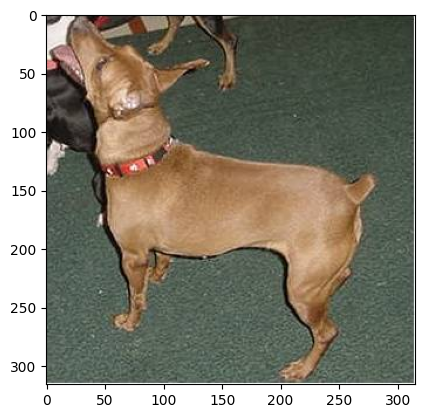

In [13]:
test_img = cv2.imread('/content/test/dogs/dog.10010.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

In [14]:
(test_img.shape)

(316, 315, 3)

In [15]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
test_input.shape

(1, 256, 256, 3)

In [16]:
# prediction for dog

model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step


array([[1.]], dtype=float32)

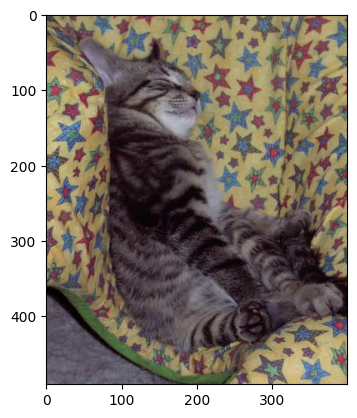

In [17]:
test_img = cv2.imread('/content/test/cats/cat.10026.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

In [18]:
(test_img.shape)

(491, 400, 3)

In [19]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
test_input.shape

(1, 256, 256, 3)

In [20]:
# prediction for cat

model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[1.]], dtype=float32)

In [21]:
# Predidcting on randomely Selected Test Images

number = int(input('Please Select On How Many Images on You Want to Check The Model: '))

for i in range(1,number+1):

     print(f"We are testing the randomly selected {i}-th image.")

     test_file_path = '/content/test'

     classes = os.listdir(test_file_path)

     selected_class = random.choice(classes)

     images = os.listdir(os.path.join(test_file_path,selected_class))

     selected_image = random.choice(images)

     selected_image_path = os.path.join(test_file_path, selected_class, selected_image)

     test_img = cv2.imread(selected_image_path)
     test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

     test_img = cv2.resize(test_img,(256,256))
     test_input = test_img.reshape((1,256,256,3))
     test_input.shape



     def check_image(model_input):
         if model.predict(test_input) == 0:
              print(f'Result: The {i}-th Image is Cat Image')
         else:
              print(f'Result: The {i}-th Image is Dog Image')


     check_image(model.predict(test_input))
     plt.imshow(test_img)
     plt.show()

Output hidden; open in https://colab.research.google.com to view.